# Testing for upscaling images while keeping the original aspect ratio

In [64]:
from PIL import Image, ImageOps
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np
from helper_functions.helper_functions import pixels_between_points
import pathlib
import platform
plt2 = platform.system()
if plt2 == 'Windows': pathlib.PosixPath = pathlib.WindowsPath
import cv2

from scipy.ndimage import map_coordinates

In [71]:
image_path = "C:/Users/Endre/Desktop/MasterProject/model_creation/images/Tiny_not_valid_granule.png"

original_image = Image.open(image_path)
# original_image.thumbnail(size=(1024,1024), resample=Image.Resampling.NEAREST) # Granules are greyscaled, ie heatmaps
cutout_height, cutout_width = np.array(original_image).shape[:2]
print(f"Size ({cutout_height, cutout_width})")
MAX_SIZE = 1024
# Calc max resize while keeping aspect ratio
max_scale_height = int(np.floor(MAX_SIZE / cutout_height))
max_scale_width  = int(np.floor(MAX_SIZE / cutout_width))
print(f"Max scaling: ({max_scale_height, max_scale_width})")
print(f"New size ({cutout_width*max_scale_width, cutout_height*max_scale_height})")
upscaled_image = original_image.resize((cutout_width*max_scale_width, cutout_height*max_scale_height))
original_image

Size ((35, 25))
Max scaling: ((29, 40))
New size ((1000, 1015))


In [69]:
# Pad what is left to get (1024, 1024)
image_width, image_height = upscaled_image.size
delta_w = MAX_SIZE - image_width
delta_h = MAX_SIZE - image_height
padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
new_im = ImageOps.expand(upscaled_image, padding)
print(f"Final size: {new_im.size}")

Final size: (1024, 1024)


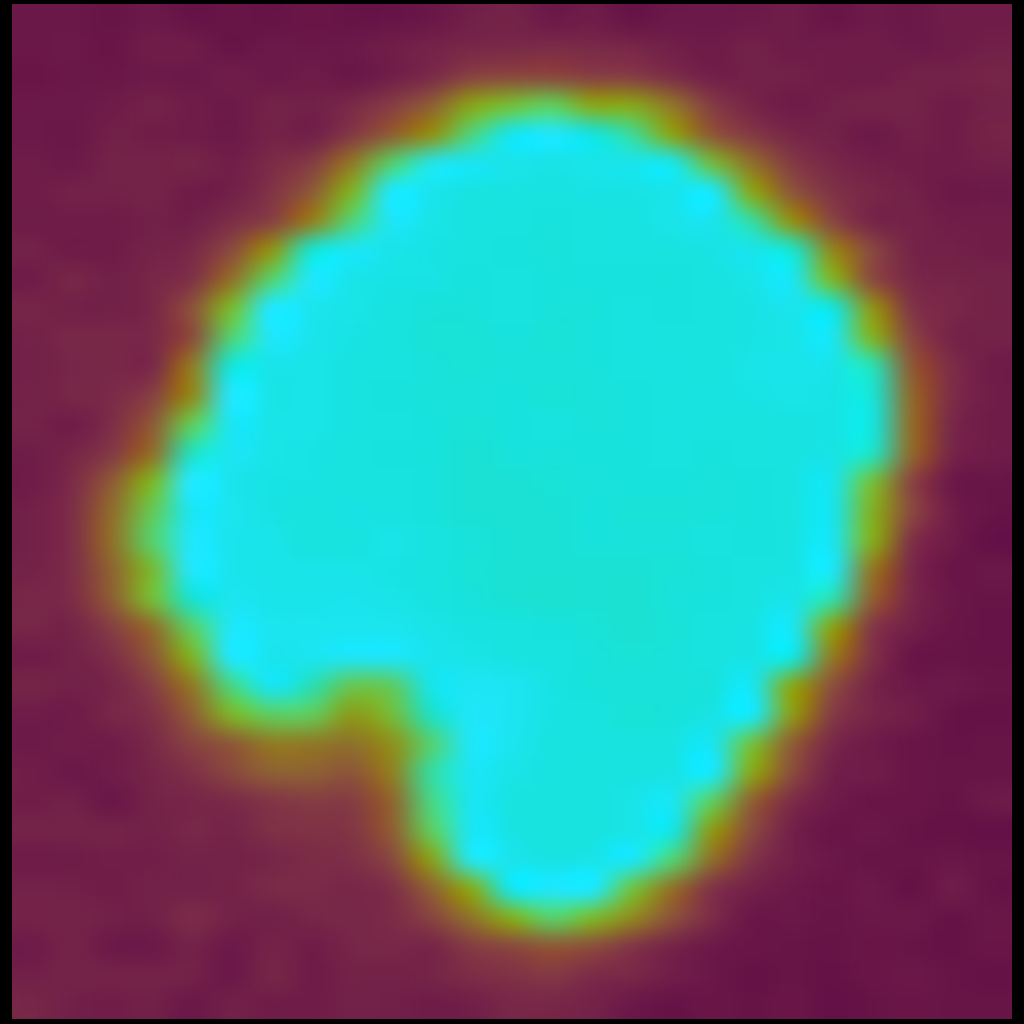

In [70]:
new_im

In [31]:
# Image.fromarray(res).save("C:/Users/Endre/Desktop/MasterProject/model_creation/images/Tiny_not_valid_granule.png")